# Сравнение оценок и эффективные оценки. Задача 1


__Ильичёв А.С., 693__

In [19]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Сгенерируем $M = 100$  выборок $X_1, \dots, X_{1000}$  из равномерного распределения на отрезке $[0, \theta]$ для трех значений $\theta$ .

In [20]:
M = 100
N = 1000
thetas = [1, 5, 13]
all_samples = [sts.uniform(0, theta).rvs(size=(M, N)) for theta in thetas]

#### 2. Для каждой выборки $X_1, \dots, X_{n}$ для всех $n \le 1000$ посчитаем оценки параметра $\theta$ из теоретической задачи.

In [21]:
def make_estimator(func): # функция построения массива оценок
    # цикл по наборам выборок для каждого theta
    ests = []
    for samples in all_samples:
        ests.append(np.array([[func(sample[:i]) for i in range(1, N + 1)]
                              for sample in samples]))
    return ests

In [22]:
est = [None] * 4

a) $\hat \theta_0 = 2\overline X$ 

In [23]:
est[0] = make_estimator(lambda x: 2 * np.mean(x))

b) $\hat \theta_1 = (n+1)X_{(1)}$

In [24]:
est[1] = make_estimator(lambda x: (len(x) + 1) * np.min(x))

c) $\hat \theta_2 = X_{(1)} + X_{(n)}$

In [25]:
est[2] = make_estimator(lambda x: np.max(x) + np.min(x))

d) $\hat \theta_3 = \frac{n+1}n X_{(n)}$

In [37]:
est[3] = make_estimator(lambda x: (len(x) + 1) / len(x) * np.max(x))

#### 3. Посчитаем для всех полученных оценок $\hat\theta$ квадратичную функцию потерь $(\hat\theta - \theta)^2$ и для каждого фиксированного $n$ усредним по выборкам.

In [38]:
def calc_losses(theta_num):
    losses = [None] * len(est)
    for num, estimator in enumerate(est):
        losses[num] = []
        # среднее по выборкам для каждого n
        for j in range(N): 
            losses[num].append(np.mean(
                [(estimator[theta_num][i][j] - thetas[theta_num])**2 
                 for i in range(M)]))
    return losses

In [39]:
losses = [calc_losses(i) for i in range(len(thetas))]

Также зададим функции риска, посчитанные в теоретической задаче.

In [40]:
theor_loss = [None] * 4

In [41]:
theor_loss[0] = lambda theta, n: theta ** 2 / (3 * n) 

In [42]:
theor_loss[1] = lambda theta, n:  n * theta ** 2 / (n + 2) 

Для оценки c) мы не считали функцию риска.

In [43]:
theor_loss[3] = lambda theta, n: theta ** 2 / (n * (n + 2))

#### 4. Для каждого из трех значений $\theta$ построим графики усредненных функций потерь в зависимости от $n$. 

In [44]:
ns = np.arange(1, N + 1)
# limit_per - процент от значения theta
def make_plot(exclude=set(), limit_per=None):
    for theta_num, theta in enumerate(thetas):
        plt.figure(figsize=(10, 5))
        est_nums = list(set(np.arange(len(est))) - exclude) # set difference
        for est_num in est_nums:
            plt.plot(ns, losses[theta_num][est_num], label=str(est_num))
            if est_num != 2:
                plt.plot(ns, theor_loss[est_num](theta, ns), alpha=0.7,
                         label='theoretical '+str(est_num), linestyle='--')
        plt.xlabel('n')
        plt.ylabel(r'$\overline{(\hat \theta_n - \theta)^2}$')
        plt.legend(title='Номер оценки')
        plt.title(r'$\theta =$'+str(theta))
        if limit_per:
            plt.ylim(0, limit_per * theta)
        plt.show()

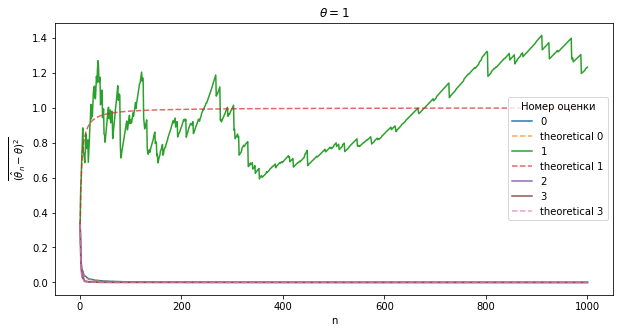

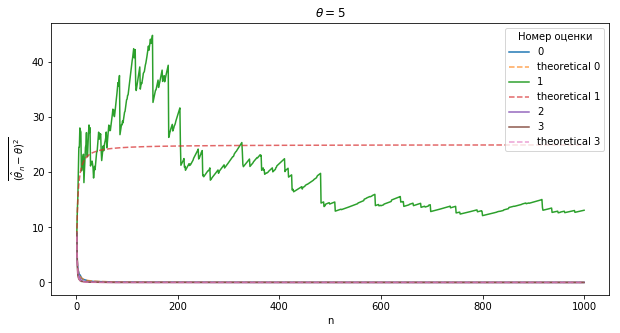

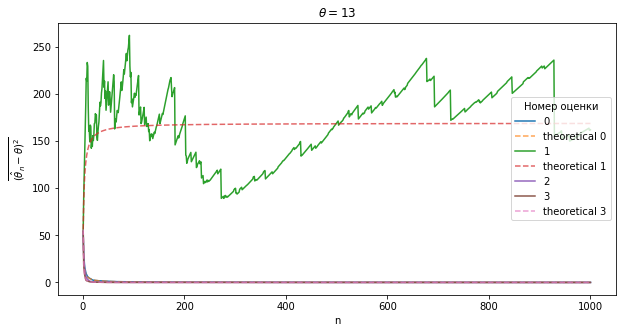

In [45]:
make_plot()

Оценка $(1)$, как мы уже видели в задаче 2.1, не является состоятельной. В этой задаче факт еще раз подтверждается как теорией (функция риска стремится не к нулю, а к $\theta^2$ с ростом $n$), так и экспериментом (на графике при больших $n$ средний квадрат разности оценки и истинного значения колеблется около $\theta^2$).

Теперь исключим оценку $(1)$ и посмотрим на другие.

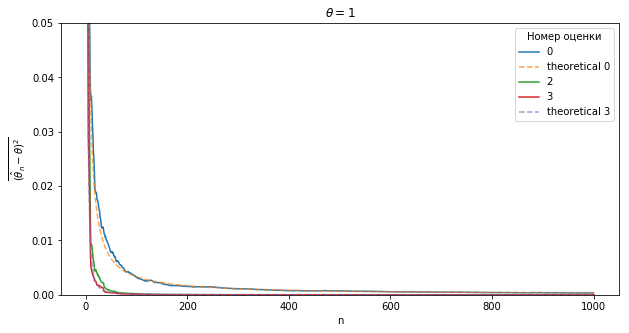

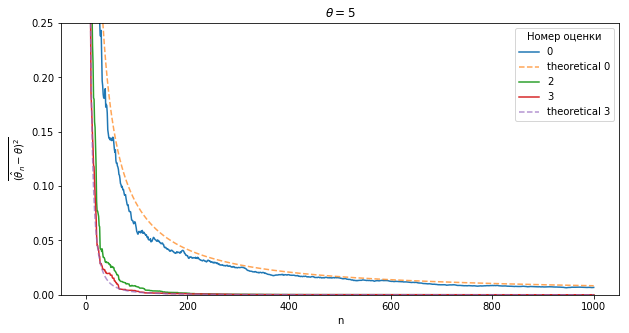

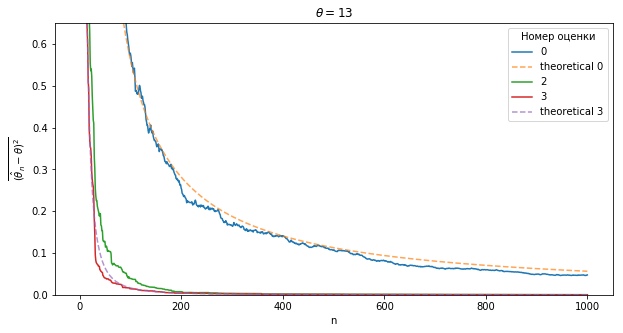

In [46]:
make_plot(exclude={1}, limit_per=0.05)

Усредненная функция потерь для оценки $(0)$ ведет себя так, как предсказано теорией (пропорциональна $1/n$). Усредненная функция потерь для оценки $(3)$ пропорциональна $1/n^2$, поэтому посмотрим на нее поближе.

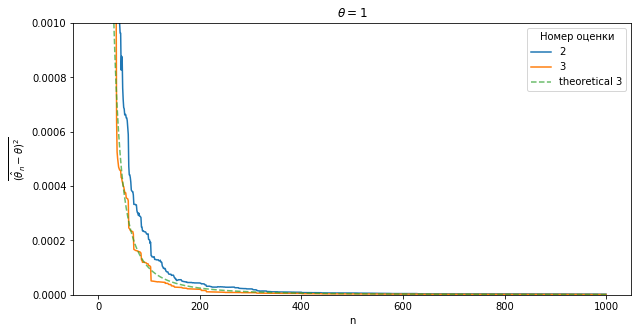

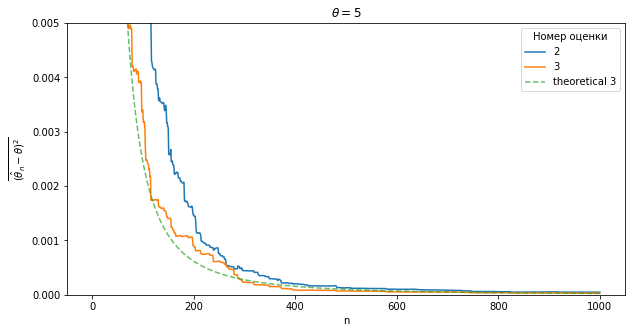

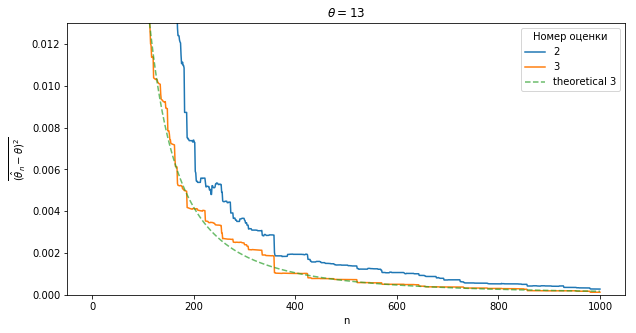

In [47]:
make_plot(exclude={1, 0}, limit_per=0.001)

Тоже видим согласие с теорией.

#### 5. Вывод.

Промежуточные выводы уже были сделаны. Согласие теории и эксперимента объясняется тем, что усреднением по 100 выборкам мы симулируем взятие матожидания в функции риска. Функция риска оценки $(2)$, не посчитанная теоретически, стремится к нулю чуть медленнее функции риска оценки $(3)$, однако заметно быстрее всех остальных. Можно предположить, что она также пропорциональна $1/n^2$ с чуть большим коэффициентом, чем в $(3)$.  